# 単層ニューラルネットワークによる手書き文字の分類

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(42)
tf.set_random_seed(42)

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
num_units = 1024

x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))#ブロードキャストルールが適応されるため一行で良い
hidden1 = tf.nn.relu(tf.matmul(x, w1) +b1)

w0 = tf.Variable(tf.zeros([num_units, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) +b0)

In [3]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [4]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [5]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x:batch_xs, t:batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x:mnist.test.images, t:mnist.test.labels})
        print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 2625.205566, Accuracy: 0.923900
Step: 200, Loss: 2141.922607, Accuracy: 0.936600
Step: 300, Loss: 1874.338379, Accuracy: 0.942100
Step: 400, Loss: 1549.760132, Accuracy: 0.954200
Step: 500, Loss: 1593.963379, Accuracy: 0.953500
Step: 600, Loss: 1346.771606, Accuracy: 0.959700
Step: 700, Loss: 1347.517334, Accuracy: 0.959500
Step: 800, Loss: 1320.094971, Accuracy: 0.959100
Step: 900, Loss: 1187.581665, Accuracy: 0.963700
Step: 1000, Loss: 1063.840088, Accuracy: 0.966900
Step: 1100, Loss: 1298.376221, Accuracy: 0.959700
Step: 1200, Loss: 1091.711426, Accuracy: 0.968000
Step: 1300, Loss: 1060.663818, Accuracy: 0.966800
Step: 1400, Loss: 1111.945801, Accuracy: 0.964300
Step: 1500, Loss: 1001.828369, Accuracy: 0.969500
Step: 1600, Loss: 1107.246338, Accuracy: 0.966900
Step: 1700, Loss: 966.396362, Accuracy: 0.971400
Step: 1800, Loss: 993.463196, Accuracy: 0.971100
Step: 1900, Loss: 1006.869995, Accuracy: 0.970700
Step: 2000, Loss: 897.943848, Accuracy: 0.973500


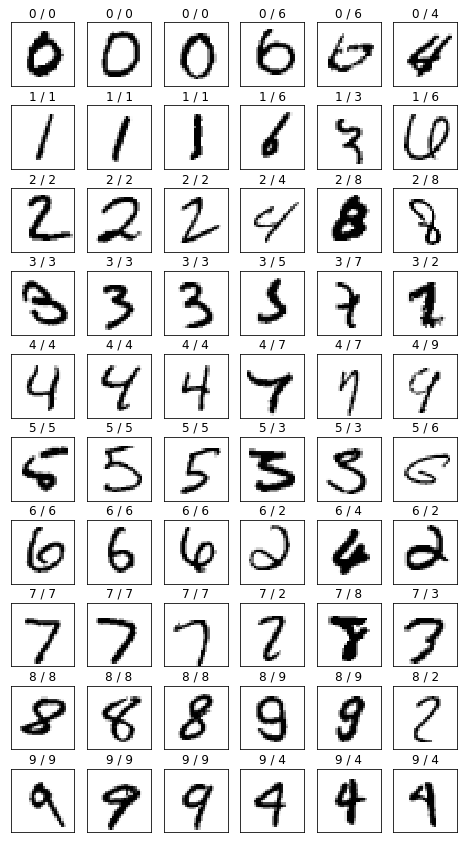

In [12]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict = {x:images, t:labels})

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip (images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i: #行ごとに出力したいので行番号と違うと予測されたものはパス
            continue
        if (c < 4 and actual == i) or (c>=4 and actual != i):
            subplot = fig.add_subplot(10, 6, i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape(28,28), vmin= 0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
            c+=1
        if c>6:
            break